## ASTR 600 - Cosmology

## HW 3

### Iver Warburton

### October 2023

In [1]:
# Our lovely imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Problem 1

#### part ii.)

In [2]:
# Constants

c = 2.99 * 10**5 # km/s
h = 0.7
H_0 = h*100
#Omegam0 = 0.3
#OmegaL0 = 0.7
z_max = 10
z = np.linspace(0, z_max, 100)

In [3]:
# Calculate comoving distance

# Define function to build integrand
def integrand_comdist(z, Omegam0, OmegaL0):
    # Integrand expression for comoving distance that was provided in problem set
    #X = c/(H_0*(Omega_m0*(1+z)**3 + Omega_L0 + (1 - Omega_m0 - Omega_L0)*(1+z)**2)**(1/2))
    X_com = (c/H_0) * (1/((1+z) * (Omegam0*(1+z)**3 + OmegaL0)**(1/2)))
    return X_com  
#integrand_comdist


# Function to calculate comoving distance
def calc_comdist(z_vals, Omegam0, OmegaL0):
    #comdist_vals = []
    comdist = np.array([quad(integrand_comdist, 0, z_val, args=(Omegam0, OmegaL0))[0] for z_val in z])
    #comdist_vals.append(comdist)
    return comdist

In [4]:
# Function to calculate luminosity distance
def calc_lumdist(z_vals, Omegam0, OmegaL0):  #, comdist):  #z_vals, Omegam0, OmegaL0):
    comdist = calc_comdist(z_vals, Omegam0, OmegaL0)
    #lumdist_vals = []
    #for z in z_vals:
    lumdist = comdist * (1+z_vals)
    #lumdist_vals.append(lumdist)
    return lumdist

In [5]:
# Function to calculate angular distance
def calc_angdist(z_vals, Omegam0, OmegaL0):  #comdist):  #z_vals, Omegam0, OmegaL0):
    comdist = calc_comdist(z_vals, Omegam0, OmegaL0)
    #angdist_vals = []
    #for z in z_vals:
    angdist = comdist / (1+z_vals)
    #angdist_vals.append(angdist)
    return angdist

In [6]:
# Plot results
def dists_plot(z_vals):

    ## SETUP ##
    # Set figure
    fig, ax = plt.subplots(figsize=(10,8)) #(8,6))
    
    Omegam0_03 = 0.3
    Omegam0_1 = 1.0
    OmegaL0_07 = 0.7
    OmegaL0_0 = 0

    # Calculate distances
    lumdist_vals03 = calc_lumdist(z_vals, Omegam0_03, OmegaL0_07)
    lumdist_vals1 = calc_lumdist(z_vals, Omegam0_1, OmegaL0_0)
    
    comdist_vals03 = calc_comdist(z_vals, Omegam0_03, OmegaL0_07)
    comdist_vals1 = calc_comdist(z_vals, Omegam0_1, OmegaL0_0)
    
    angdist_vals03 = calc_angdist(z_vals, Omegam0_03, OmegaL0_07)
    angdist_vals1 = calc_angdist(z_vals, Omegam0_1, OmegaL0_0)
    

    ## PLOTTING ##
    # Plot distances
    plt.plot(z_vals, np.log10(lumdist_vals03), label='$d_L$ for $\Omega_{m,0} = 0.3$', ls='-', color='lightblue', lw=2)
    plt.plot(z_vals, np.log10(lumdist_vals1), label='$d_L$ for $\Omega_{m,0} = 1$', ls=':', color='blue', lw=2)
    
    plt.plot(z_vals, np.log10(comdist_vals03), label='$d_m$ for $\Omega_{m,0} = 0.3$', ls='-', color='grey', lw=2)
    plt.plot(z_vals, np.log10(comdist_vals1), label='$d_m$ for $\Omega_{m,0} = 1$', ls=':', color='black', lw=2)
    
    plt.plot(z_vals, np.log10(angdist_vals03), label='$d_A$ for $\Omega_{m,0} = 0.3$', ls='-', color='pink', lw=2)
    plt.plot(z_vals, np.log10(angdist_vals1), label='$d_A$ for $\Omega_{m,0} = 1$', ls=':', color='red', lw=2)
    

    ## LABELLING ##
    # Label axes   
    plt.xlabel('Redshift z', fontsize=16)
    plt.ylabel('Log Distances [Mpc]', fontsize=16)

    # Increse axis numbering text size
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    # Plot features
    plt.xlim(0, 10)
    plt.legend(fontsize=10)  #14)
    plt.grid(True, color='lightgrey', ls='-.')
    plt.title('Various Distance Measures', fontsize=18)

    
    ## SAVING ##
    # Save and show
    plt.savefig("HW3Q1DistancesPlot.pdf", format="pdf", bbox_inches="tight", overwrite=True)
    plt.show()

/var/folders/1w/ktxtfrr91bj5bztz50dqm0fr0000gn/T/ipykernel_32956/1624047874.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z_vals, np.log10(lumdist_vals03), label='$d_L$ for $\Omega_{m,0} = 0.3$', ls='-', color='lightblue', lw=2)
/var/folders/1w/ktxtfrr91bj5bztz50dqm0fr0000gn/T/ipykernel_32956/1624047874.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z_vals, np.log10(lumdist_vals1), label='$d_L$ for $\Omega_{m,0} = 1$', ls=':', color='blue', lw=2)
/var/folders/1w/ktxtfrr91bj5bztz50dqm0fr0000gn/T/ipykernel_32956/1624047874.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z_vals, np.log10(comdist_vals03), label='$d_m$ for $\Omega_{m,0} = 0.3$', ls='-', color='grey', lw=2)
/var/folders/1w/ktxtfrr91bj5bztz50dqm0fr0000gn/T/ipykernel_32956/1624047874.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z_vals, np.log10(comdist_vals1), label='$d_m$ for $\Omega_{m,0} = 1$', ls=':', color='black', lw=2)
/var/fol

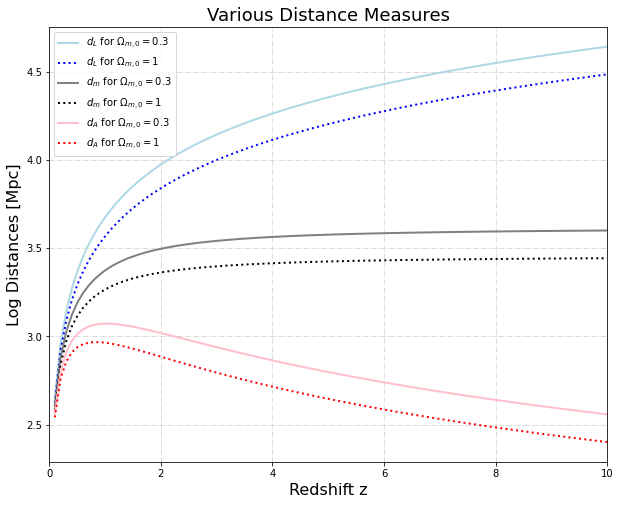

In [7]:
dists_plot(z)

This plot very closely matches the prediction plot I drew before coding this notebook.  

- Luminosity distance is simply the comoving distance increased by a factor of $(1+z)$, so this distance increases a little bit more quickly as z increases.

- Angular diameter distance is certainly the most curious result of these, as it increases with z and then suddenly slopes back down, but it's entirely possible to come up with this concept before plotting.  This behaviour has to do with the way that angular sizes behave in an expanding Universe.  Earlier in the process of expansion, distant objects were much closer to us and therefore covered a larger angular area on the sky.  The images we see of these objects are from light that left the objects when they were much closer and larger on our sky, so this turnover point is closely related to the expansion rate of the Universe.

## Problem 3

In [8]:
# Constants
c = 2.9979 * 10**8 # m/s
h = 0.7
H_0 = 100 * h # units of km s-1 Mpc-1
z_max = 2
z = np.linspace(0, z_max, 100)
Omega_m0 = 0.3
Omega_L0 = 0.7

### Analytical integration

Completed in Mathematica and result is rewritten here to be plotted.

In [9]:
# Expression for result of analytical integration
X_analint = ((c * z)/(H_0)) - ((3 * c * z**2 * Omega_m0)/(4 * H_0)) + ((c * z**3 * (3*Omega_m0 + 2*(1 - Omega_m0 - Omega_L0))**2)/(8 * H_0)) - ((c * z**3 * (6*Omega_m0 + 2*(1 - Omega_m0 - Omega_L0)))/(12 * H_0)) - ((c * z**2 * (1 - Omega_m0 - Omega_L0))/(2 * H_0))

### Numerical integration

In [10]:
# Define function to build integrand
def integrand(z):
    # Integrand expression for comoving distance that was provided in problem set
    X = c/(H_0*(Omega_m0*(1+z)**3 + Omega_L0 + (1 - Omega_m0 - Omega_L0)*(1+z)**2)**(1/2))
    return X  

In [11]:
# Calculate the integral for comoving distance numerically
X_numint = [quad(integrand, 0, z_val)[0] for z_val in z]
#print(np.shape(X_numint))

In [12]:
# Plot results
def comdist_plot(z, results_numint, results_analint):
    
    ## PLOT ##
    # Set figure
    fig, ax = plt.subplots(figsize=(8,6))

    # Plot distances
    #plt.plot(z, results_numint, label='Numerical', ls='-', color='lightblue', lw=2)
    #plt.plot(z, results_analint, label='Analytical', ls='-', color='blue', lw=2)
    # Plot distances normalised to numerical result
    plt.plot(z, results_numint/np.max(results_numint), label='Numerical', ls='-', color='lightblue', lw=2)
    plt.plot(z, results_analint/np.max(results_numint), label='Analytical', ls='-', color='blue', lw=2)
    
    # Plot difference between the calculations
    difference = results_numint/np.max(results_numint) - results_analint/np.max(results_numint)
    plt.plot(z, difference, label='Difference', ls='--', color='black', lw=2)

    
    ## POINTS ##
    # Add point
    index_diff10 = np.where(difference >= 0.1)[0][0]
    diff10 = difference[index_diff10]
    z_diff10 = z[index_diff10]
    print("z at 10% difference:", z_diff10.round(3))
    plt.scatter(z[index_diff10], difference[index_diff10], color='red', label='10% Difference: \nz = '+str(z_diff10.round(3)))
    
    # Add pointer lines
    plt.axhline(0.1, ls=':', c='red', lw=1)
    plt.axvline(z_diff10, ls=':', c='red', lw=1)
    
    
    ## LABELLING ##
    # Label axes   
    plt.xlabel('Redshift z', fontsize=16)
    plt.ylabel('Comoving Distance', fontsize=16)

    # Increse axis numbering text size
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    # Plot features
    plt.xlim(0, 2)
    plt.ylim(0, 1)
    plt.legend(fontsize=14)
    plt.grid(True, color='lightgrey', ls='-.')
    plt.title('Comoving Distance Calculations', fontsize=18)

    
    ## SAVE ##
    # Save and show
    plt.savefig("HW3Q3Plot.pdf", format="pdf", bbox_inches="tight", overwrite=True)
    plt.show()

z at 10% difference: 1.333


/var/folders/1w/ktxtfrr91bj5bztz50dqm0fr0000gn/T/ipykernel_32956/3647817420.py:52: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("HW3Q3Plot.pdf", format="pdf", bbox_inches="tight", overwrite=True)


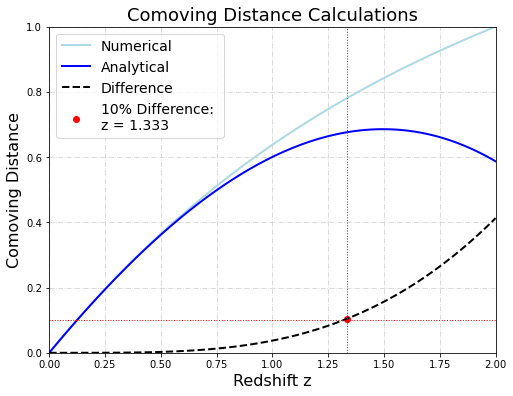

In [13]:
# Create the plot
comdist_plot(z, X_numint, X_analint)

The analytical expansion is only accurate to 10% out to redshift $z=1.333$.  After that point, the expansion result curves sharply downward and becomes extremely unreliable.  It's an excellent match out to roughly $z=0.6$, so this is the realm in which is could be extremely useful to calculate comoving distance.